<h3><b>Formula 1 Data</b> - Matteo Zuliani</h3>
<H4>Motivazioni:</H4>
<ul>
    <li>Interesse personale</li>
    <li>Innovazione e tecnologia</li>
    <li>Aspetti storici e culturali:</li>
</ul>
<hr>
<h4>Domande che mi sono posto</h4>
<ul>
    <li>Quali sono i piloti con più campionati?</li>
    <li>Chi sono i piloti con più vittorie?</li>
    <li>Quali sono le nazionalità che hanno dato luce a più piloti?</li>
    <li>Quanti campioni ci sono stati nella storia della F1?</li>
    <li>Quali sono i piloti con più pole position?</li>
    <li>Quali sono i decenni che hanno visto correre il maggior numero di piloti?</li>
    <li>Quali piloti hanno il maggior numero di anni di carriera?</li>
    <li>Quali sono i piloti più efficienti dalla pole position?</li>
</ul>

<h3>I dati utilizzati</h3>
<h5>È stato utilizzato un dataset contenente le informazioni sui piloti di Formula 1</h5>
<h4>Cosa contiene il dataset?</h4>
<ul>
    <li>Carriera dei piloti</li>
    <li>Performance nelle stagioni</li>
    <li>Status di campione</li>
</ul>
<hr>
<h4>Dati mancanti</h4>
<ul>
    <li>Dettagli sulle auto</li>
    <li>Dettagli sugli stipendi</li>
</ul>
<hr>
<h4>Disponibilità</h4>
<ul>
    <li>Il dataset è disponibile online su Kaggle. Può trovarlo <a href="https://www.kaggle.com/datasets/petalme/f1-drivers-dataset" target="_blank" >qui.</a></li>
</ul>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches

# carica il file CSV in un DataFrame
csv_file = "F1Drivers_Dataset.csv"
df = pd.read_csv(csv_file)

# sostituisce NaN con 0 in tutto il DataFrame
df = df.fillna(0)

<h4>Vediamo il grafico rappresentante i 10 piloti con più campionati vinti</h4>

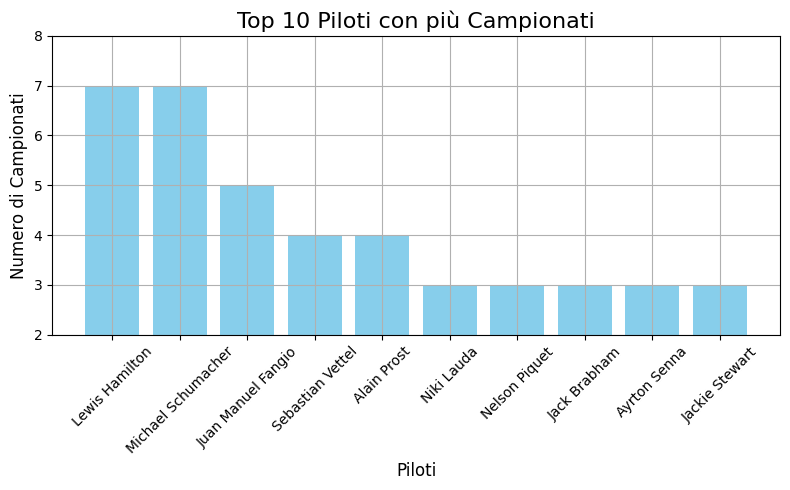

In [2]:
# ordina il dataset per numero di Championships
top_drivers = df.sort_values(by='Championships', ascending=False).head(10)

# grafico a barre dei primi 10 piloti con più campionati
plt.figure(figsize=(8, 5))
plt.bar(top_drivers['Driver'], top_drivers['Championships'], color='skyblue')
plt.title('Top 10 Piloti con più Campionati', fontsize=16)
plt.xlabel('Piloti', fontsize=12)
plt.ylabel('Numero di Campionati', fontsize=12) 
plt.xticks(rotation=45, fontsize=10)
plt.ylim(2, 8)
plt.grid(True)

# aggiusta i margini
plt.tight_layout()

plt.show()

<h5>Lewis Hamilton e Michael Schumacher guidano la classifica con 3 campionati in più rispetto a Fangio</h5>

<h4>Che pilota ha vinto più gare?</h4>

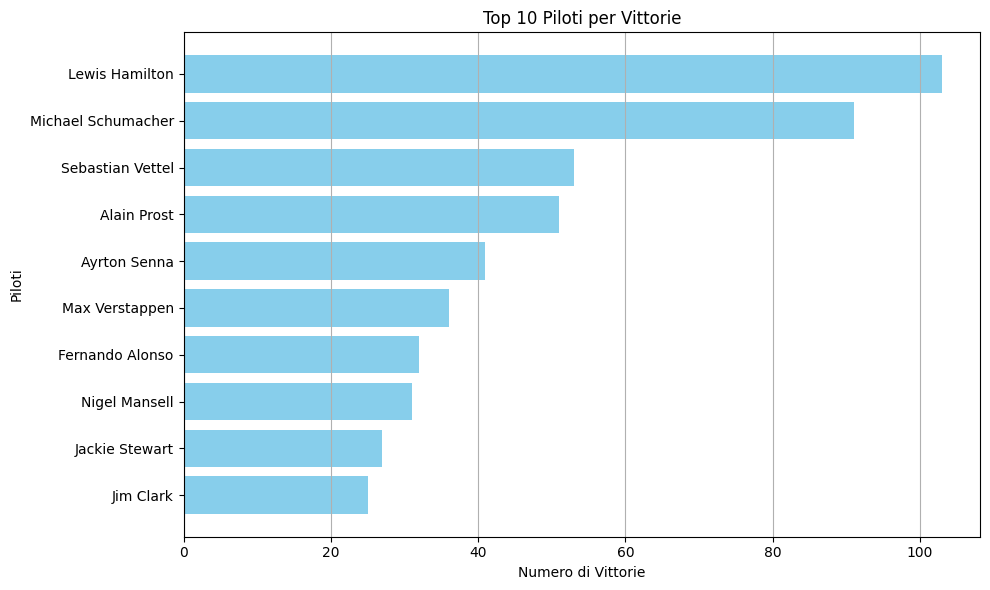

In [3]:
# ordina i piloti per vittorie in ordine decrescente
top_10_winners = df.sort_values(by='Race_Wins', ascending=False).head(10)

#dati per il grafico
pilots = top_10_winners['Driver']
race_wins = top_10_winners['Race_Wins']

plt.figure(figsize=(10, 6))
plt.barh(pilots, race_wins, color='skyblue')
plt.xlabel('Numero di Vittorie')
plt.ylabel('Piloti')
plt.title('Top 10 Piloti per Vittorie')
plt.gca().invert_yaxis() 
plt.grid(True, axis='x')
plt.tight_layout()


plt.show()

<h5>Lewis Hamilton possiede il maggior numero di vittorie nella F1, con 103 successi</h5>

<h4>Vediamo la rappresentazione grafica delle nazioni che hanno dato luce a più piloti</h4>

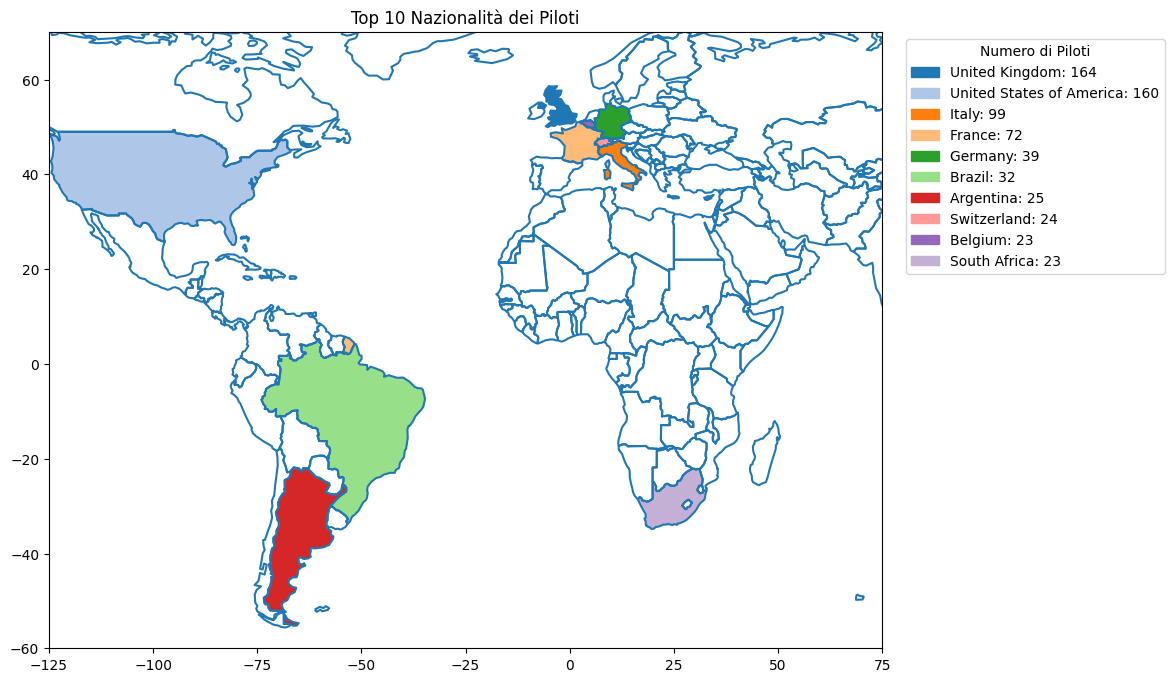

In [4]:
# conta nazionalità dei piloti
nationality_counts = df['Nationality'].value_counts().head(10)

# Dizionario per la corrispondenza delle nazionalità ai paesi
country_mapping = {
    'United Kingdom': 'United Kingdom',
    'United States': 'United States of America',
    'Italian': 'Italy',
    'French': 'France',
    'German': 'Germany',
    'Brazilian': 'Brazil',
    'Argentine': 'Argentina',
    'Swiss': 'Switzerland',
    'Belgian': 'Belgium',
    'South African': 'South Africa',
    'West Germany': 'Germany'  # Aggiorna il mapping per West Germany
}

# carica la mappa vuota dal file locale
world = gpd.read_file('/Users/matteo/F1Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# fai corrispondere ai nomi nella mappa
nationality_counts.index = nationality_counts.index.to_series().replace(country_mapping)

# aggiungi i conteggi al dataframe dei paesi
world = world.set_index('NAME').join(nationality_counts.rename('Count'))
world = world.reset_index()

# crea una lista di colori 
colors = plt.cm.tab20.colors[:len(nationality_counts)]

# crea la mappa
fig, ax = plt.subplots(figsize=(18, 8))  # Imposta una larghezza maggiore rispetto all'altezza
world.boundary.plot(ax=ax)

# ritaglia
ax.set_xlim([-125, 75])
ax.set_ylim([-60, 70])

# dizionario per i colori personalizzati
color_mapping = {country: color for country, color in zip(nationality_counts.index, colors)}

# colora i paesi
for country, color in color_mapping.items():
    if country == 'Germany':
        world[world['NAME'] == country].plot(ax=ax, color=color)
    elif country in world['NAME'].values:
        world[world['NAME'] == country].plot(ax=ax, color=color)

# titolo
plt.title('Top 10 Nazionalità dei Piloti')

#legenda 
handles = []
for country, count in nationality_counts.items():
    corrected_country = country_mapping.get(country, country)  # Usa il mapping originale, se disponibile
    color = color_mapping[country]
    handles.append(mpatches.Patch(color=color, label=f"{corrected_country}: {count}"))

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1.02, 1.0), title='Numero di Piloti')

plt.show()

<h6>Vediamo che il Regno Unito ha contribuito alla formazione del maggior numero di piloti</h6>

<h4>Quanti piloti sono stati campioni durante la storia della F1?</h4>

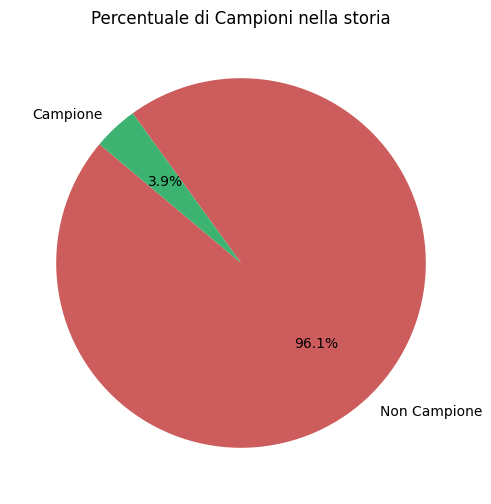

In [5]:
# cambio i bool in etichette
df['Champion'] = df['Champion'].map({True: 'Campione', False: 'Non Campione'})

# conteggio 
champion_counts = df['Champion'].value_counts()

# grafico
plt.figure(figsize=(8, 6))
plt.pie(champion_counts, labels=champion_counts.index, autopct='%1.1f%%', startangle=140, colors=['indianred', 'mediumseagreen'])
plt.title('Percentuale di Campioni nella storia')
plt.show()

<h5>Vediamo che sul totale di piloti, il 3,9% ha vinto un campionato</h5>

<h4>Quale pilota conduce la classifica delle pole position?</h4>

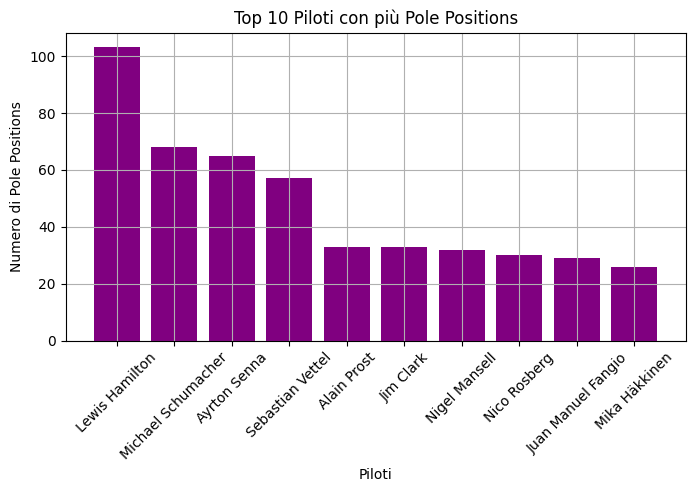

In [6]:
# ordinare il dataset per numero di pole 
top_pole_positions = df.sort_values(by='Pole_Positions', ascending=False).head(10)

# grafico
plt.figure(figsize=(8, 4))
plt.bar(top_pole_positions['Driver'], top_pole_positions['Pole_Positions'], color='purple')
plt.title('Top 10 Piloti con più Pole Positions')
plt.xlabel('Piloti')
plt.ylabel('Numero di Pole Positions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h5>Lewis Hamilton è in testa alla classifica con 103 pole position</h5>

<h4>Quale decennio ha visto gareggiare il maggior numero di piloti?</h4>

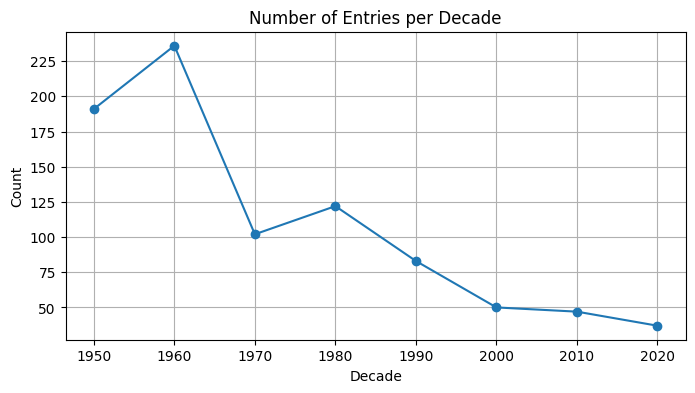

In [7]:
# contatore
decade_counts = df.groupby('Decade').size()

# grafico
plt.figure(figsize=(8, 4))
plt.plot(decade_counts.index, decade_counts.values, marker='o', linestyle='-')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Number of Entries per Decade')
plt.grid(True)
plt.show()

<h5>il decennio 1960-1970 ha visto il maggior numero di piloti della storia, dovuto soprattutto all'espansione dello sport</h5>

<h4>Top 10 piloti per anni di attività</h4>

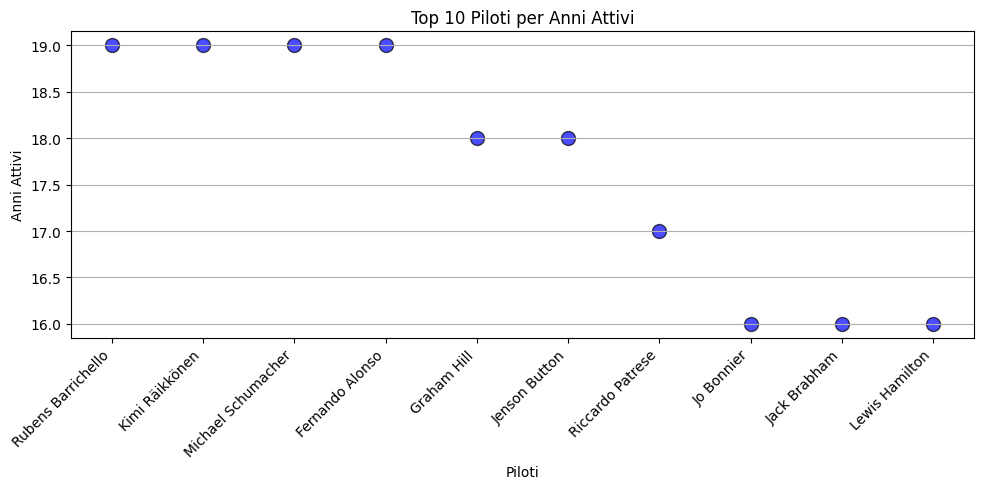

In [8]:
# Ordina i piloti 
top_10_active_years = df.sort_values(by='Years_Active', ascending=False).head(10)

# dati
pilots = top_10_active_years['Driver']
years_active = top_10_active_years['Years_Active']

# grafico
plt.figure(figsize=(10, 5))
plt.scatter(pilots, years_active, color='blue', marker='o', edgecolor='black', s=100, alpha=0.7)
plt.xlabel('Piloti')
plt.ylabel('Anni Attivi')
plt.title('Top 10 Piloti per Anni Attivi')

plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

plt.show()

<h5>Barrichello, Räikkönen, Schumacher e Alonso sono i piloti con più anni attivi</h5>

<h4>Top 5 piloti per efficienza sulle Pole Position </h4>

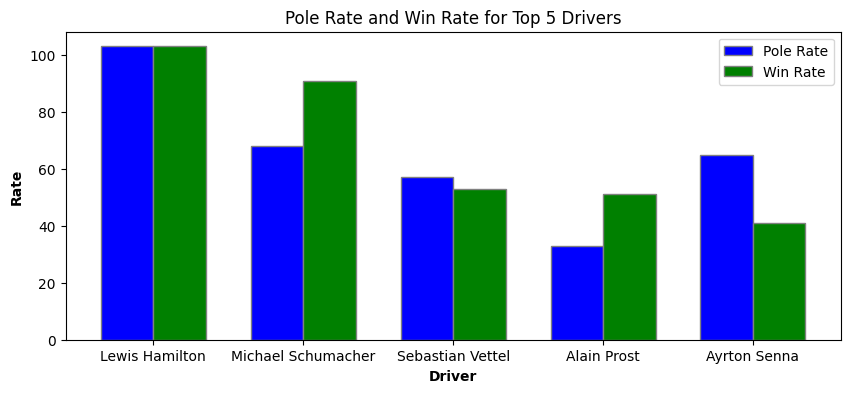

In [9]:
# trova la top 5
top_drivers = df.groupby('Driver')[['Pole_Positions', 'Race_Wins']].mean().sort_values(by='Race_Wins', ascending=False).head(5).reset_index()

fig, ax = plt.subplots(figsize=(10, 4))

#larghezza
bar_width = 0.35

# posizionamento
r1 = range(len(top_drivers))
r2 = [x + bar_width for x in r1]

ax.bar(r1, top_drivers['Pole_Positions'], color='blue', width=bar_width, edgecolor='grey', label='Pole Rate')
ax.bar(r2, top_drivers['Race_Wins'], color='green', width=bar_width, edgecolor='grey', label='Win Rate')

ax.set_xlabel('Driver', fontweight='bold')
ax.set_ylabel('Rate', fontweight='bold')
ax.set_title('Pole Rate and Win Rate for Top 5 Drivers')
ax.set_xticks([r + bar_width/2 for r in range(len(top_drivers))])
ax.set_xticklabels(top_drivers['Driver'])

ax.legend()

plt.show()

<h5>Lewis Hamilton è il pilota più efficiente, con 103 pole e 103 vittorie</h5>

<h3><b>Conclusioni</b></h3>
<ul>
    <li>Dai dati estratti possiamo capire che Lewis Hamilton è il pilota con più campionati vinti, più vittorie in carriera, più pole position e con più vittorie su pole position</li>
    <li>Il Regno Unito ha dato luce al maggior numero di piloti</li>
    <li>Durante tutta la storia della Formula 1, il 3,9% dei piloti ha vinto un campionato</li>
    <li>Negli anni 60' c'è stato un importante numero di piloti rispetto agli altri decenni</li>
    <li>Barrichello, Räikkönen, Schumacher e Alonso sono i piloti con più anni in Formula 1</li>
</ul>

